# Importing the libraries


In [1]:
import numpy as np
import pandas as pd

### Reaading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\AMAN JHA\Downloads\Crop_recommendation.csv")

In [3]:
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
data.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [5]:
data.shape

(2200, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

## DATA PREPROCESSING

checking for the null values

In [9]:
data.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [10]:
print("Number of crops given in our dataset:",len(data["label"].unique()))
print("The crops given as::",data["label"].unique())

Number of crops given in our dataset: 22
The crops given as:: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [11]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [12]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [13]:
# data['label'] = le.fit_transform(data['label'])

In [14]:
data

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

## Data visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import random

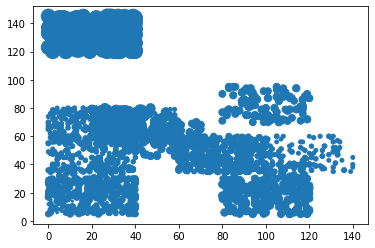

In [16]:
plt.scatter(data['N'], data['P'],data['K'])

<AxesSubplot:xlabel='N', ylabel='rainfall'>

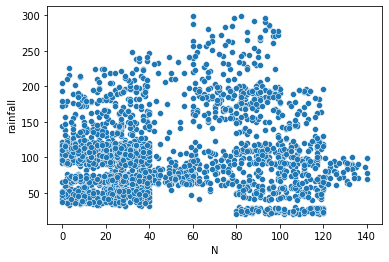

In [17]:
sns.scatterplot(x  ="N",y = "rainfall",data = data)

<AxesSubplot:xlabel='P', ylabel='rainfall'>

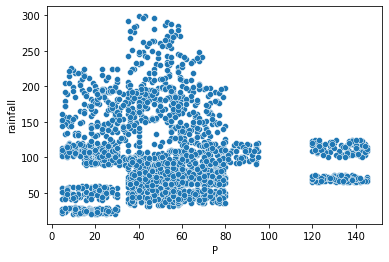

In [18]:
sns.scatterplot(x  ="P",y = "rainfall",data = data)

<AxesSubplot:xlabel='K', ylabel='rainfall'>

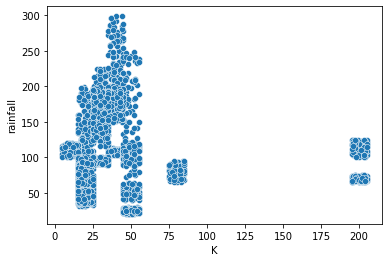

In [19]:
sns.scatterplot(x  ="K",y = "rainfall",data = data)

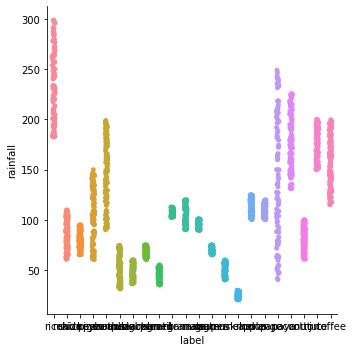

In [20]:
sns.catplot(x = 'label',y = 'rainfall',data = data)#to plot categorical vs numerical data

<AxesSubplot:xlabel='label', ylabel='count'>

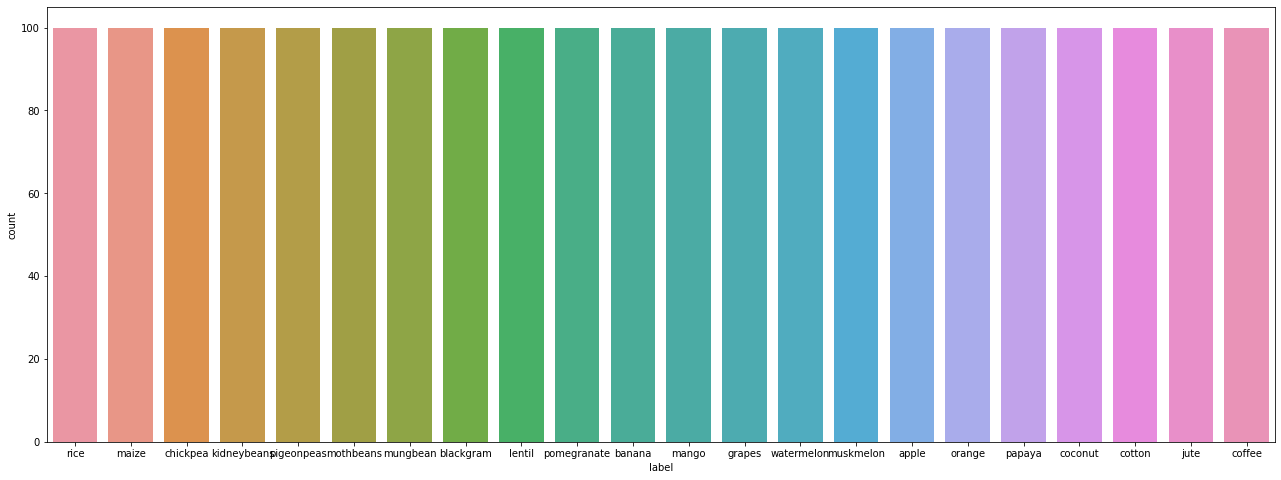

In [21]:
plt.figure(figsize=(22,8))
sns.countplot(x = 'label',data = data)

## Bivariate analysis

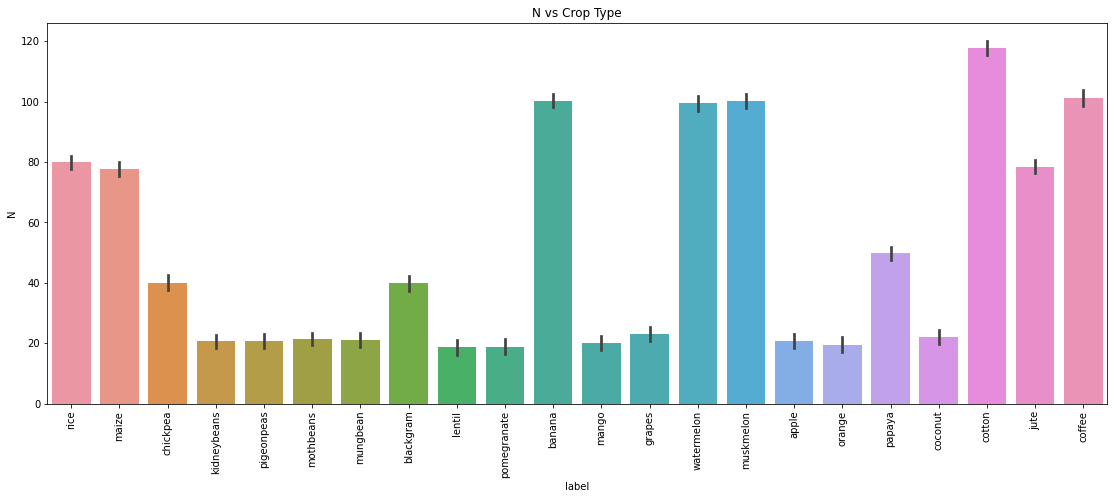

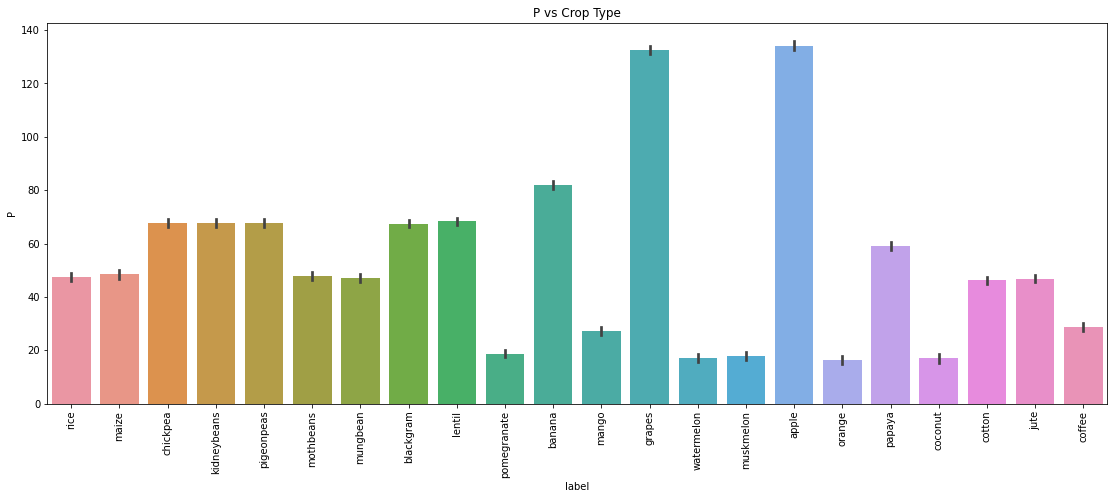

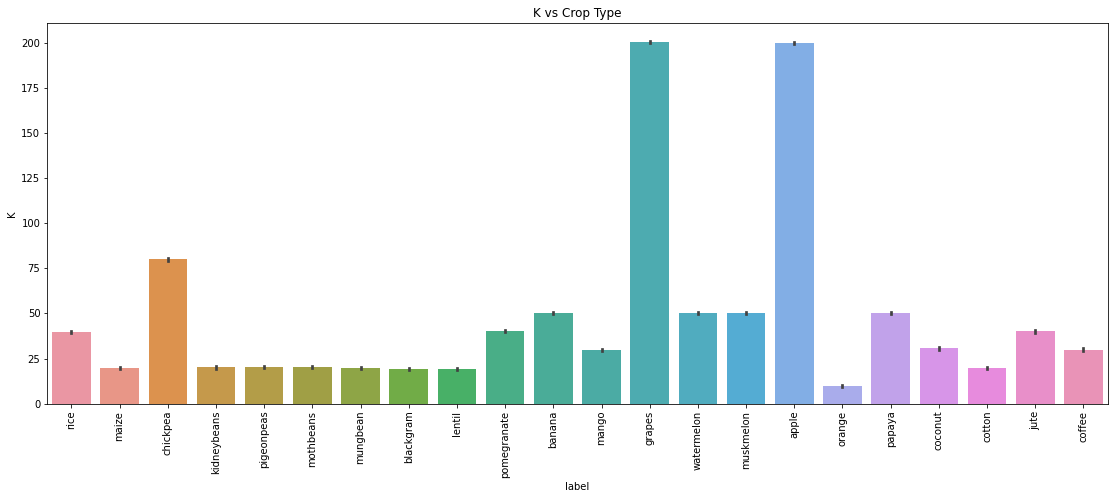

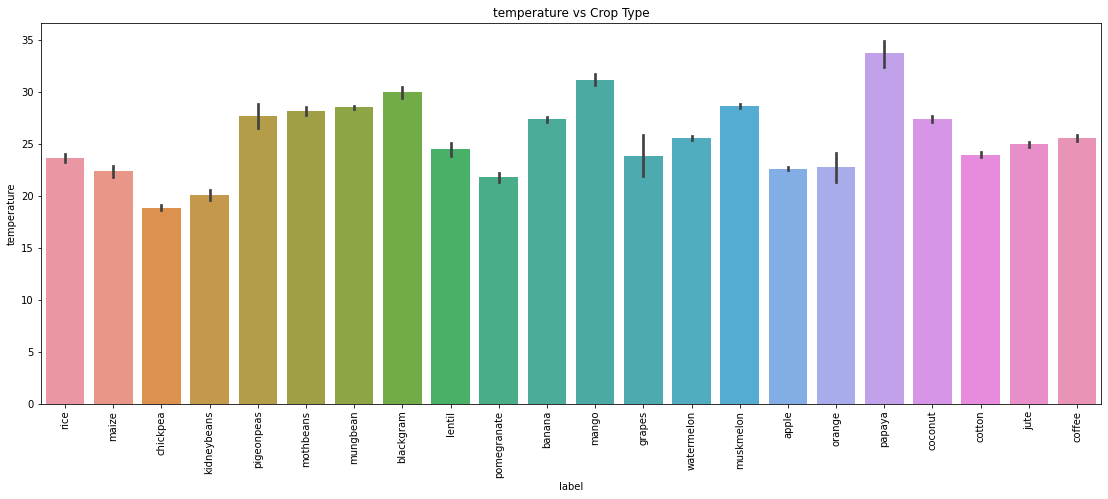

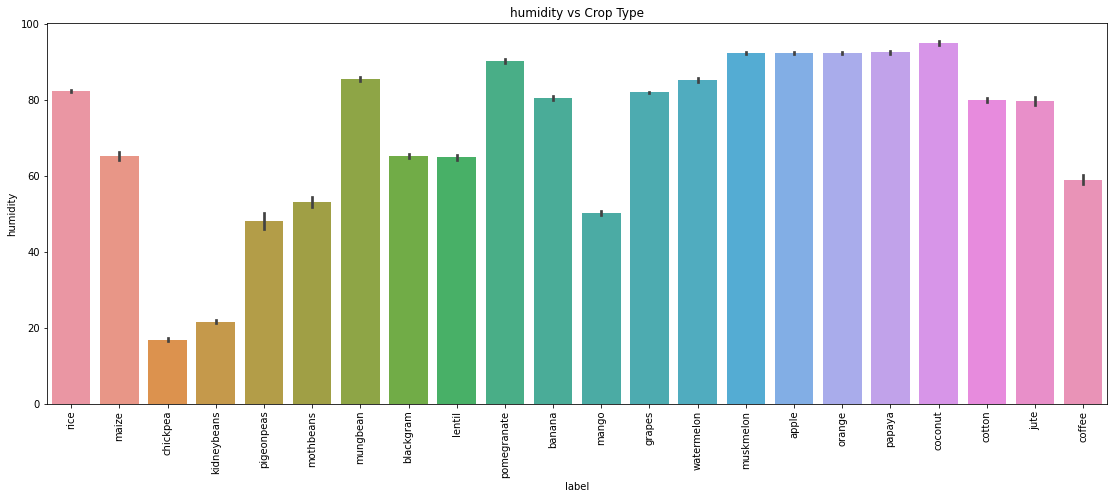

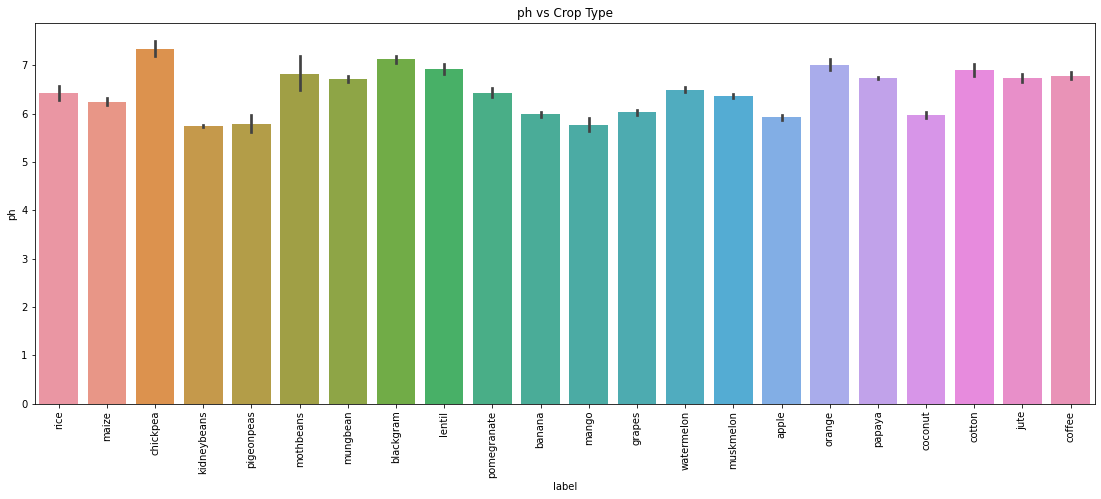

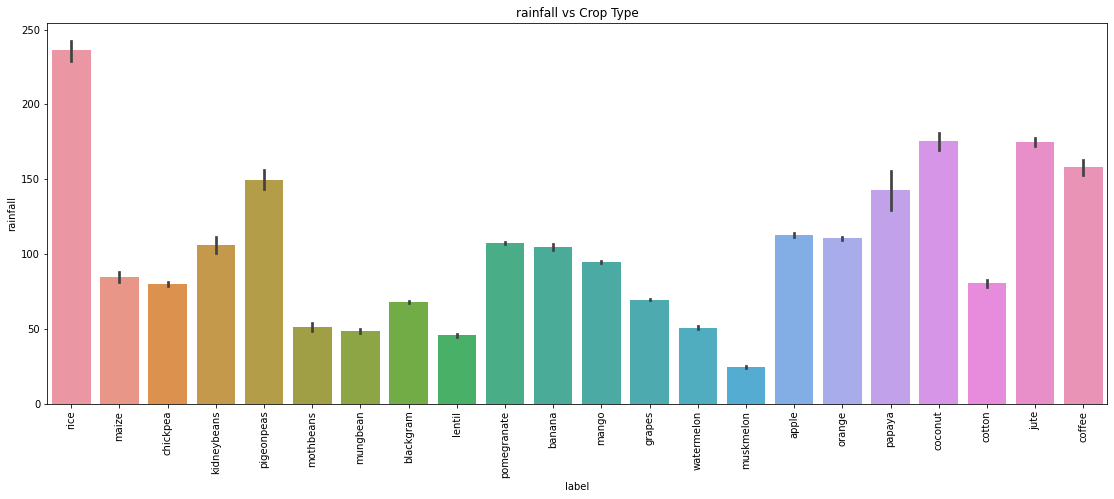

In [22]:
all_columns = data.columns[:-1]

for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = data)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

In [23]:
data.corr(method ='pearson')

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

<AxesSubplot:>

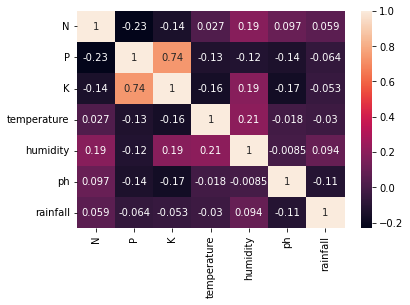

In [24]:
sns.heatmap(data.corr(),annot = True)

C:\Users\AMAN JHA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AMAN JHA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

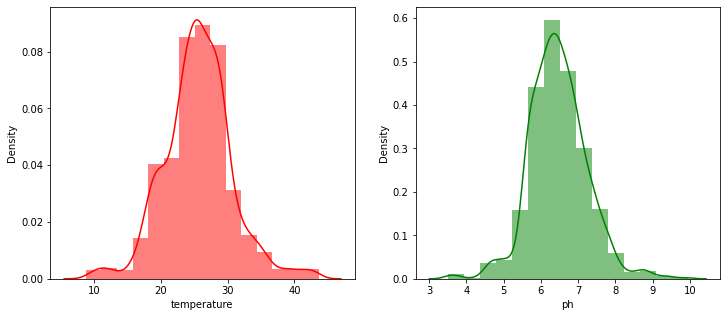

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)

sns.distplot(data['temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(data['ph'],color="green",bins=15,hist_kws={'alpha':0.5})

C:\Users\AMAN JHA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AMAN JHA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AMAN JHA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

<AxesSubplot:xlabel='K', ylabel='Density'>

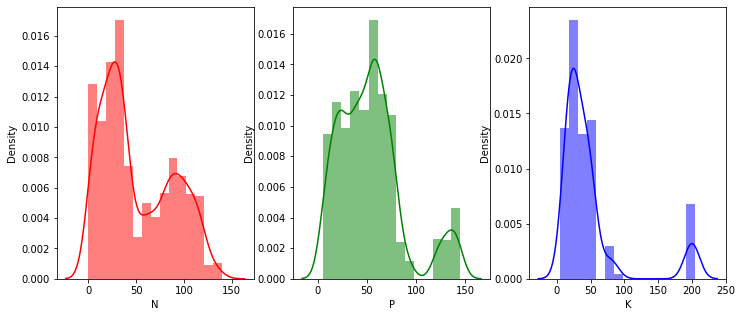

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)

sns.distplot(data['N'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 3, 2)
sns.distplot(data['P'],color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 3, 3)
sns.distplot(data['K'],color="blue",bins=15,hist_kws={'alpha':0.5})

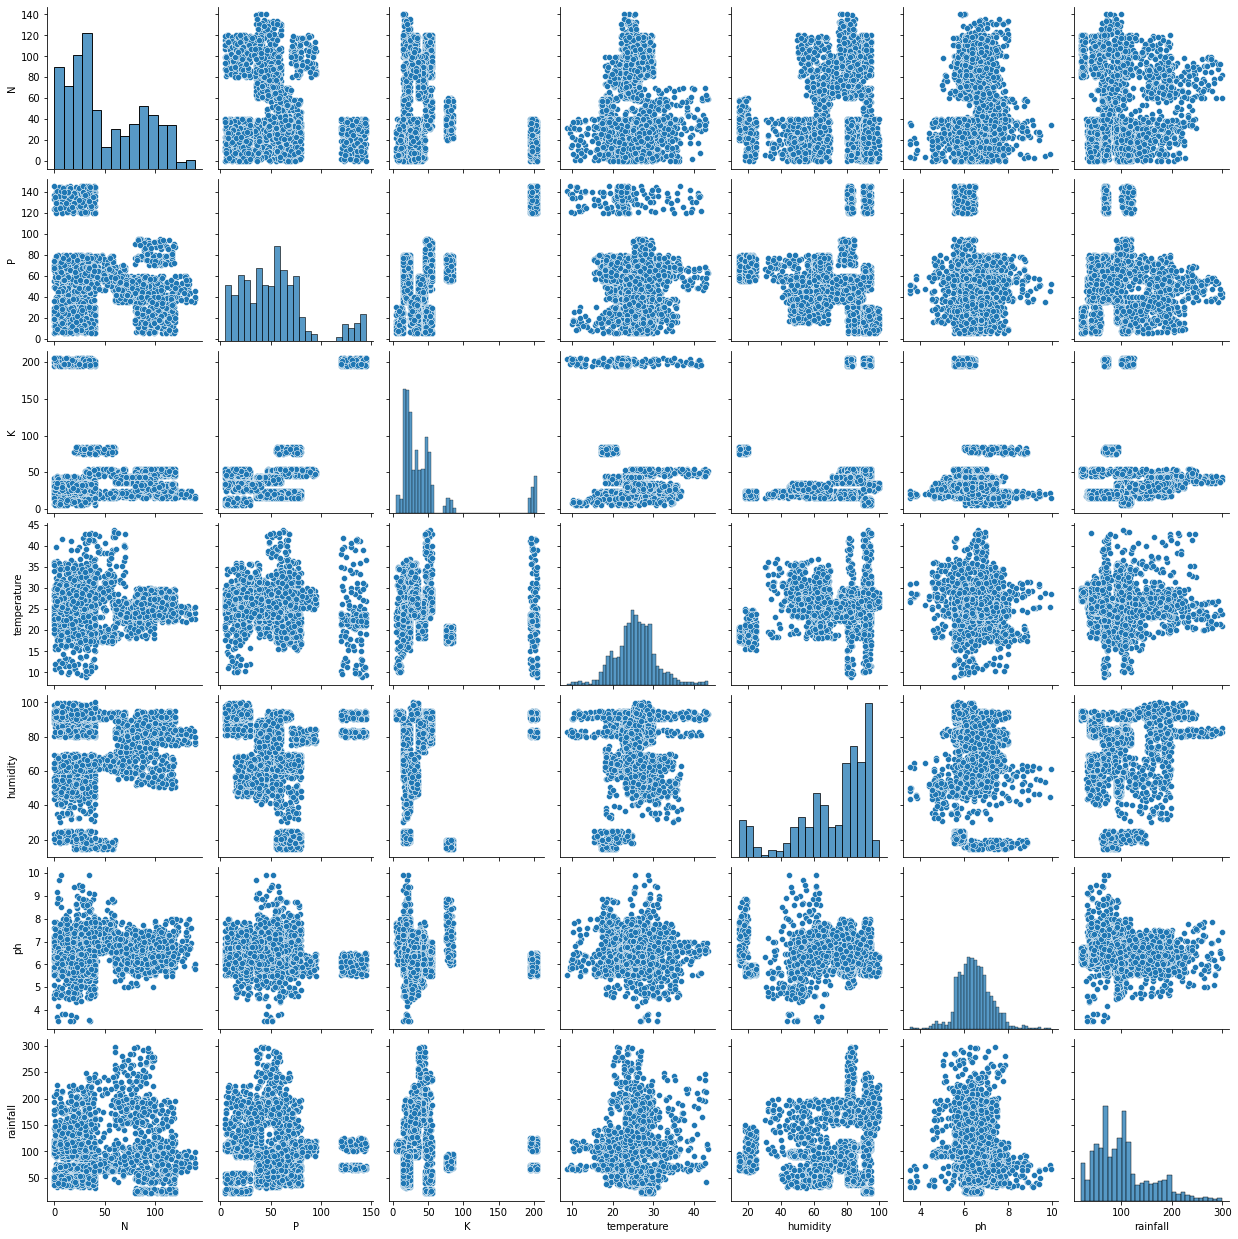

In [27]:
sns.pairplot(data)

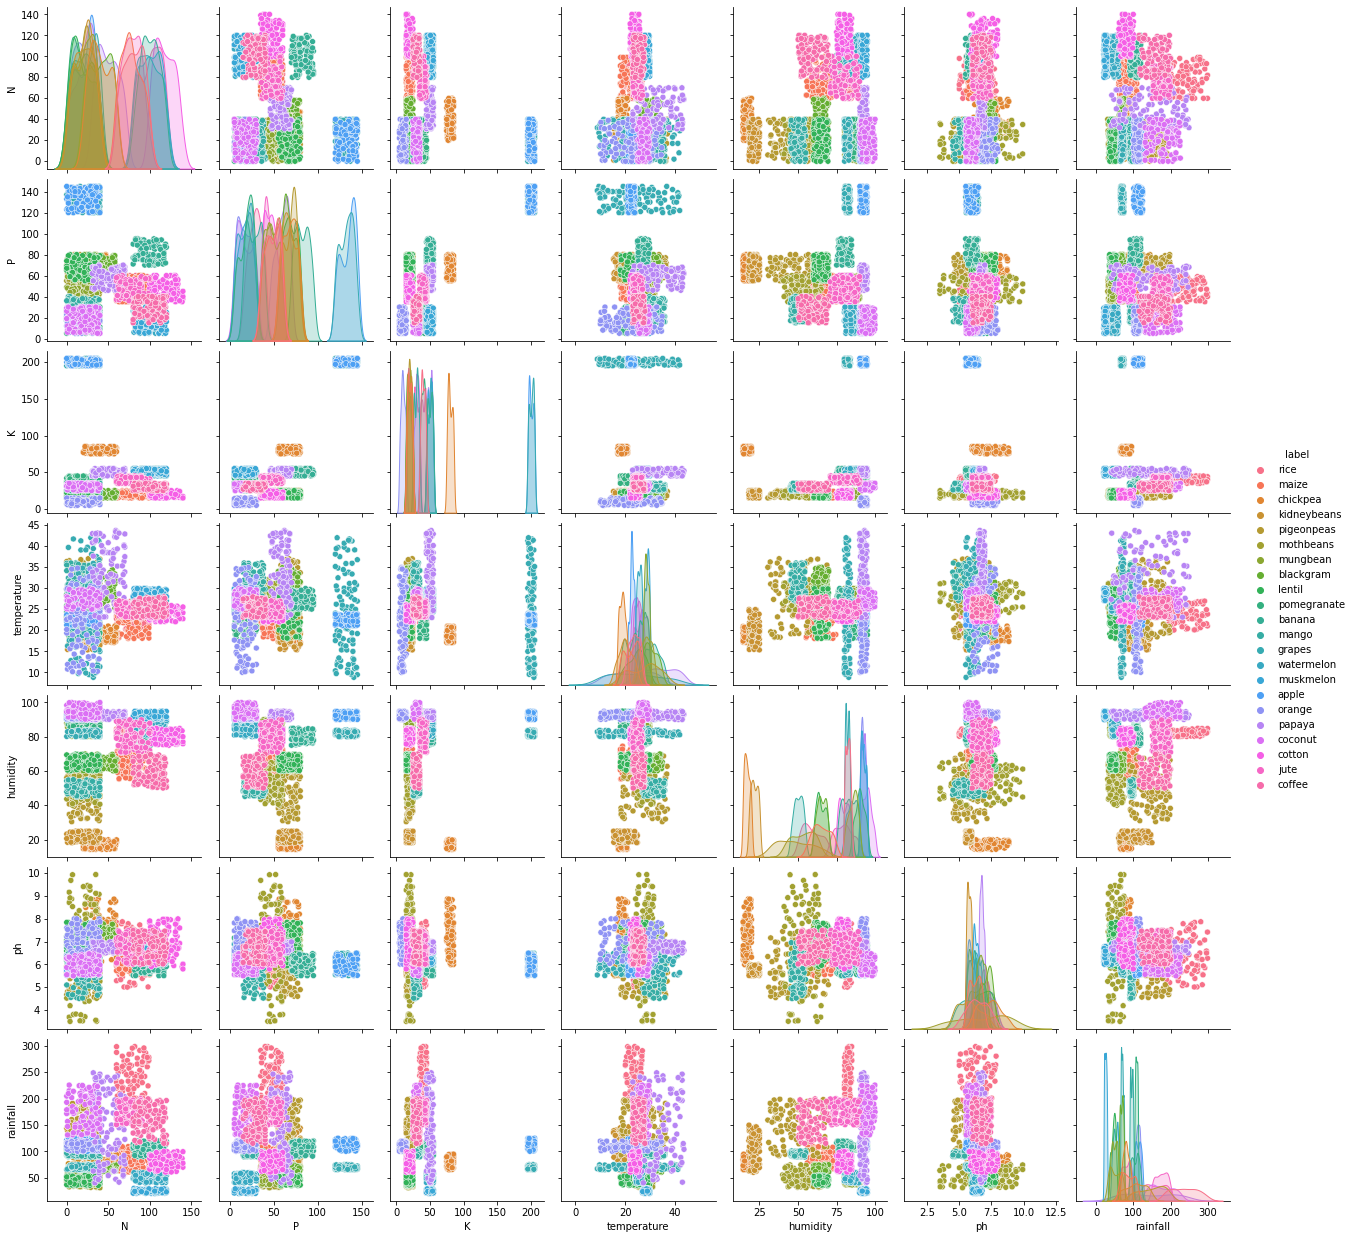

In [28]:
sns.pairplot(data,hue = 'label') #Variable in data to map plot aspects to different colors.

<Figure size 1584x576 with 0 Axes>

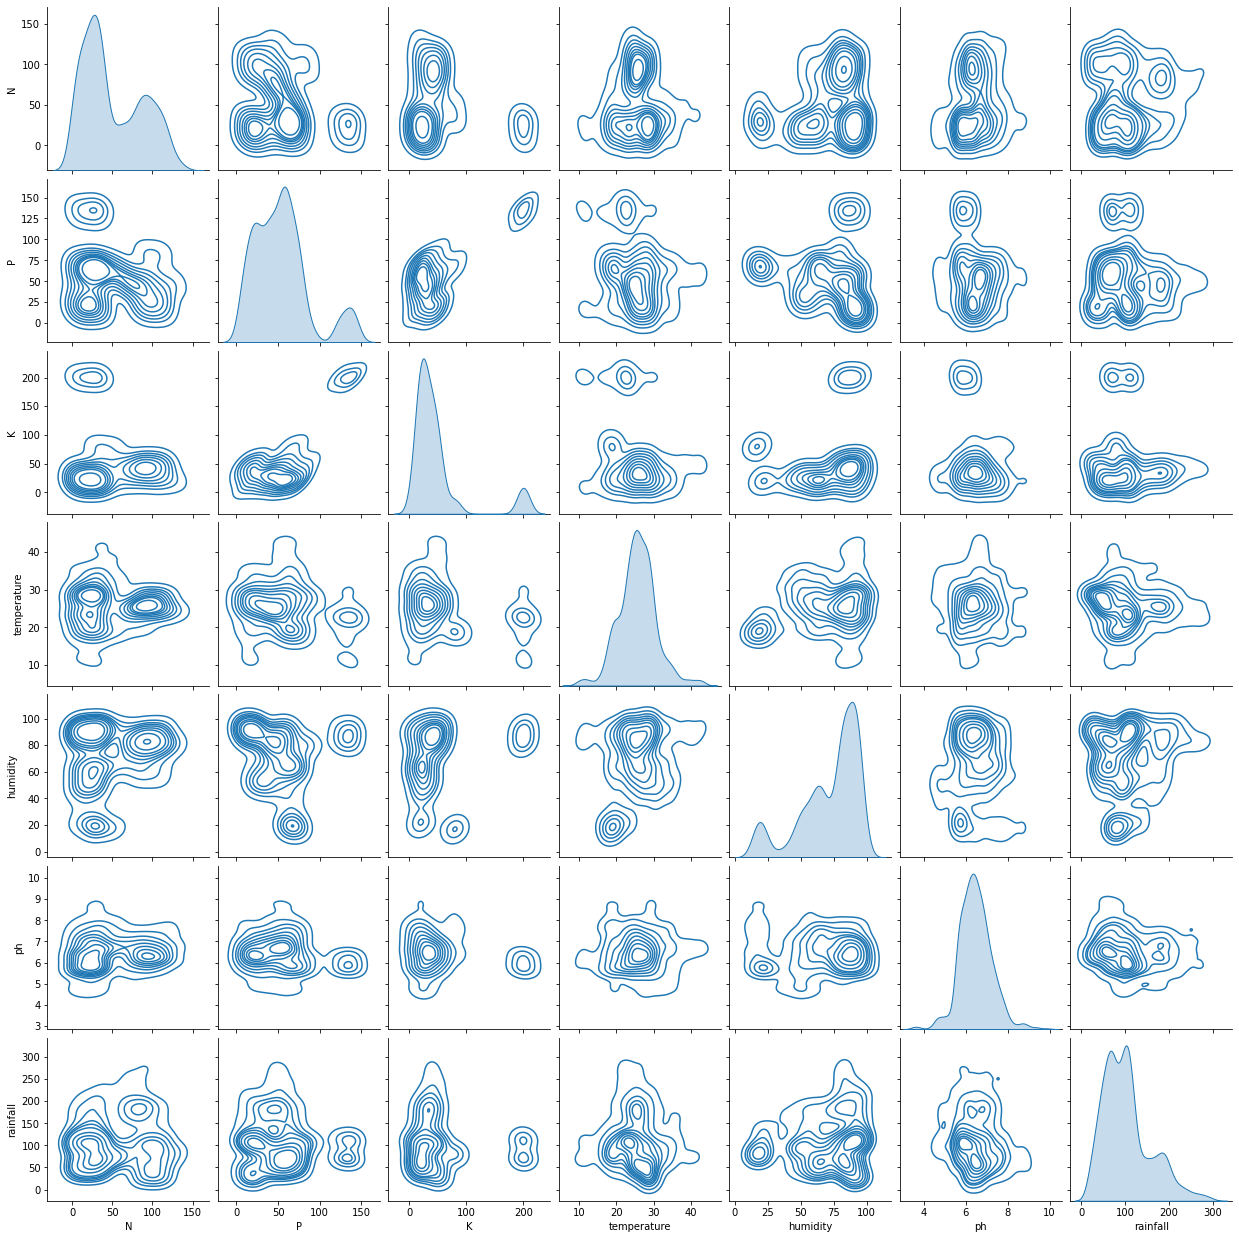

In [29]:
plt.figure(figsize=(22,8))
sns.pairplot(data, kind="kde")

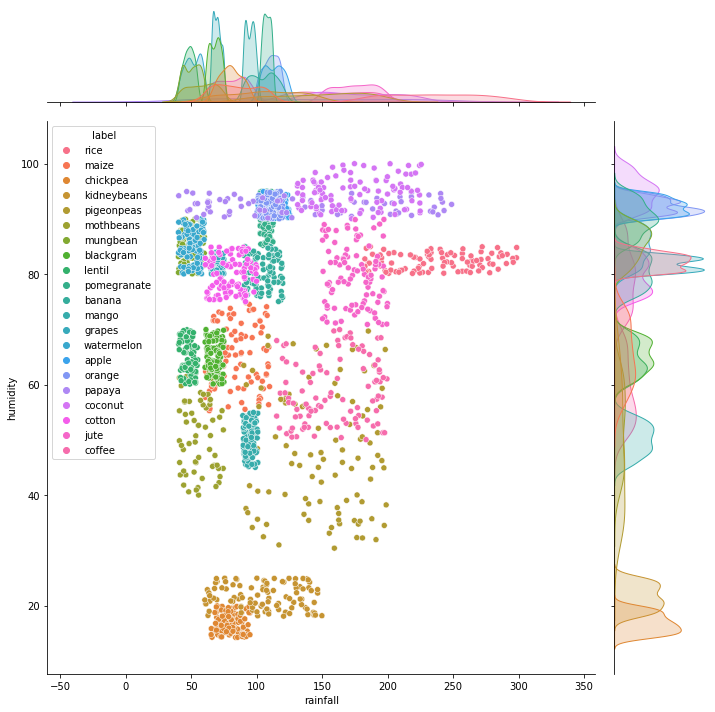

In [30]:
sns.jointplot(x="rainfall",y="humidity",data=data[(data['temperature']<40) & (data['rainfall']>40)],height=10,hue="label")
#jointplot between rainfall and humidity

<AxesSubplot:xlabel='label', ylabel='ph'>

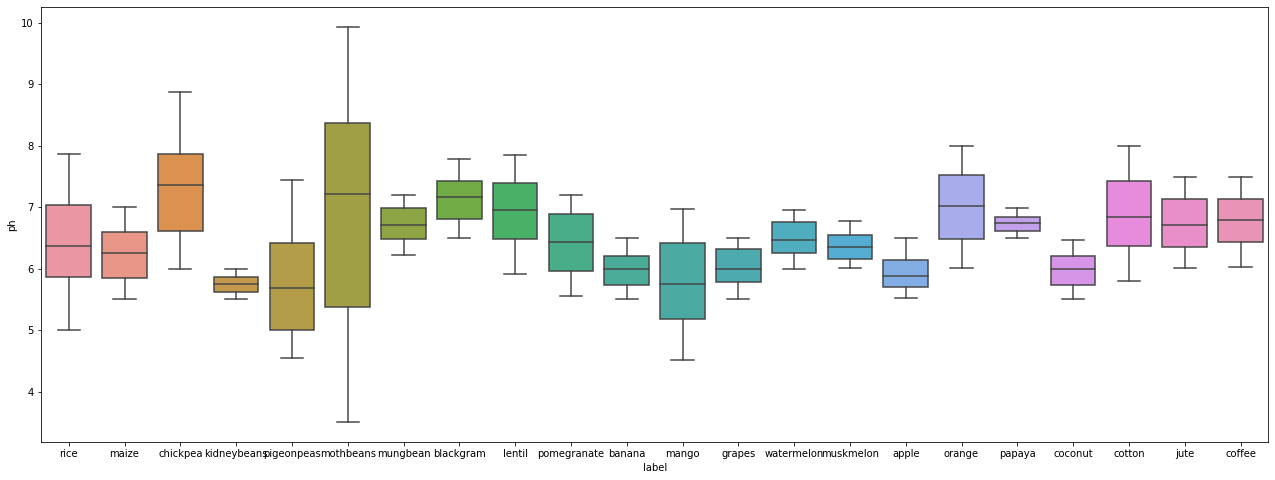

In [31]:
plt.figure(figsize=(22,8))
sns.boxplot(x = "label",y = "ph",data = data)

In [32]:
crop_summary = pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary.head()

K       N       P   humidity        ph    rainfall  \
label                                                                
apple      199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana      50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea    79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut     30.59   21.98   16.93  94.844272  5.976562  175.686646   

           temperature  
label                   
apple        22.630942  
banana       27.376798  
blackgram    29.973340  
chickpea     18.872847  
coconut      27.409892

#### Nitrogen potassium and phosphorus comparision for all the crops

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potassium',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()


### splitting independent and target values

spliiting the data is used with train, test and split merthod.

In [34]:
features = data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]#helps algorithms quickly reach the minima of the cost function
x= data.drop(['label'], axis=1)
y = data['label']
data

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [35]:
#creating two empty list to append algo with their corresponding accuracy rate to make comparision between all
accuracy_rate = []
model_name = []

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0) 
#test_size = 0.2 means 20 % of the data is test
#data and remaining 80% are the train data

In [38]:
print(x_train.shape)#trainig input
print(x_test.shape)#testing input
print(y_train.shape)#training output
print(y_test.shape)#testing output

(1760, 7)
(440, 7)
(1760,)
(440,)


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Model building

### Decision Tree algo

In [41]:
#model building

from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [42]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
y_pred  = dtc.predict(x_test)
y_pred

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'rice', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'maize', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'blackgram', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'cotton', 'grapes', 'mothbeans', 'chickpea',
       'maize', 'jute',

In [44]:
y_test

1320    watermelon
1367    watermelon
1291        grapes
264       chickpea
728      blackgram
           ...    
446     pigeonpeas
1005        banana
1919        cotton
708      blackgram
1546         apple
Name: label, Length: 440, dtype: object

##### Accuracy prediction

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
acc = accuracy_score(y_test,y_pred)
print("The accuracy rate in decision tree algorithm is ::",acc)
accuracy_rate.append(acc)
model_name.append('Decision Tree')

The accuracy rate in decision tree algorithm is :: 0.9818181818181818


In [47]:
#means in decision tree our 98 % of data are correct

#### confusion matrix

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

###  saving trained decision tree model

In [49]:
import pickle
#dumping the trained decision tree classifier using pickle.
pickle.dump(dtc,open("decisiontreemodel.pkl","wb")) # wb is for write binary format of the file 

### logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)


LogisticRegression()

In [51]:
y_pred_lr = log.predict(x_test)
y_pred_lr

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'jute', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'blackgram', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'cotton', 'grapes', 'mothbeans', 'chickpea',
       'maize', 'jute'

In [52]:
y_test

1320    watermelon
1367    watermelon
1291        grapes
264       chickpea
728      blackgram
           ...    
446     pigeonpeas
1005        banana
1919        cotton
708      blackgram
1546         apple
Name: label, Length: 440, dtype: object

In [53]:
acc2 = accuracy_score(y_test,y_pred_lr)
print("The accuracy rate in logistic regression is ::",acc2)

accuracy_rate.append(acc2)
model_name.append('Logistic reggression')

The accuracy rate in logistic regression is :: 0.9659090909090909


#### confusion matrics

In [54]:
from sklearn.metrics import confusion_matrix
cm2= confusion_matrix(y_test,y_pred)
cm2

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

### savving trained logistic regression model

In [55]:
import pickle
#dumping the trained decision tree classifier using pickle.
pickle.dump(dtc,open("logisticregressionmodel.pkl","wb")) # wb is for write binary format of the file 

###  K-nearest neighbour

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,metric = "minkowski")#we can use here euclidean , manhattan also
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [57]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'jute', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

In [58]:
y_test

1320    watermelon
1367    watermelon
1291        grapes
264       chickpea
728      blackgram
           ...    
446     pigeonpeas
1005        banana
1919        cotton
708      blackgram
1546         apple
Name: label, Length: 440, dtype: object

In [59]:
acc3 = accuracy_score(y_test,y_pred_knn)
print("The accuracy rate in k nearest neighbour is ::",acc3)

accuracy_rate.append(acc3)
model_name.append('KNN')

The accuracy rate in k nearest neighbour is :: 0.9818181818181818


In [60]:
cm3 = confusion_matrix(y_test,y_pred_knn)
cm3

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

### saving trained k nearest neighbour model

In [61]:
import pickle
#dumping the trained decision tree classifier using pickle.
pickle.dump(dtc,open("knnmodel.pkl","wb")) # wb is for write binary format of the file 

### Guassian Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [63]:
nb.fit(x_train,y_train)

GaussianNB()

In [64]:
y_pred = nb.predict(x_test)


In [65]:
y_pred

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'rice', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'cotton', 'grapes', 'mothbeans', 'chickpea',
       'maize', 'jute'

In [66]:
y_test

1320    watermelon
1367    watermelon
1291        grapes
264       chickpea
728      blackgram
           ...    
446     pigeonpeas
1005        banana
1919        cotton
708      blackgram
1546         apple
Name: label, Length: 440, dtype: object

In [67]:
from sklearn.metrics import accuracy_score

acc4 = accuracy_score(y_test,y_pred)
print("The accuracy rate for gausian naive bayes is :",acc4)


accuracy_rate.append(acc4)
model_name.append('GNB')

The accuracy rate for gausian naive bayes is : 0.990909090909091


In [68]:
cm4 = confusion_matrix(y_test,y_pred_knn)
cm4

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

### Saving trained Gaussian Naive Bayes model

In [69]:
import pickle
#dumping the trained decision tree classifier using pickle.
pickle.dump(dtc,open("naivebayesmodel.pkl","wb")) # wb is for write binary format of the file 

### SVM (Support Vector Machine)

In [70]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [71]:
y_pred = svm.predict(x_test)
y_pred

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'rice', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'cotton', 'grapes', 'mothbeans', 'chickpea',
       'maize', 'jute'

In [72]:
y_test

1320    watermelon
1367    watermelon
1291        grapes
264       chickpea
728      blackgram
           ...    
446     pigeonpeas
1005        banana
1919        cotton
708      blackgram
1546         apple
Name: label, Length: 440, dtype: object

In [73]:
acc5 = accuracy_score(y_test,y_pred)
print("The accuracy rate of support vaector machine:",acc5)

accuracy_rate.append(acc5)
model_name.append('SVM')

The accuracy rate of support vaector machine: 0.9840909090909091


In [74]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test,y_pred)
cm5

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

### saving trained model for Support Vector Machine

In [75]:
import pickle
#dumping the trained decision tree classifier using pickle.
pickle.dump(dtc,open("svmmodel.pkl","wb")) # wb is for write binary format of the file 

## Accuracy comparison

In [76]:
# plt.figure(figsize=[10,5],dpi = 100)
# plt.title('Accuracy Comparison')
# plt.xlabel('Accuracy')
# plt.ylabel('Algorithm')
# sns.barplot(x = acc,y = model,palette='dark')

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

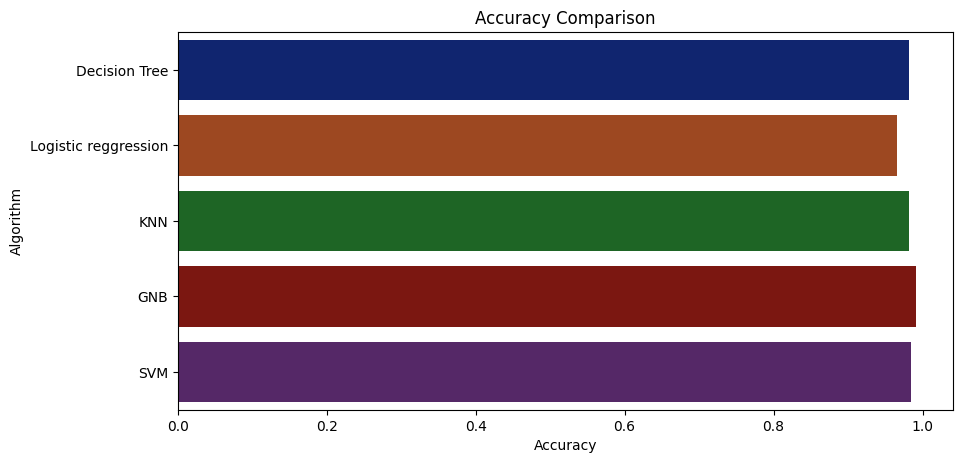

In [77]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy_rate,y = model_name,palette='dark')

### model prediction checking 

In [78]:
testing_data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = nb.predict(testing_data)
print(prediction)

['coffee']


In [79]:
prediction

array(['coffee'], dtype='<U11')

In [80]:
data = np.array([[65,18, 95, 23.60, 6.3, 14, 1]])
prediction = nb.predict(data)
print(prediction)

['grapes']
